# Exploring the Titanic Dataset

Exploratory analysis using the Titanic dataset.

Read more about the titanic dataset here: https://www.kaggle.com/c/titanic

In [2]:
import pandas as pd

#pd.set_option('precision', 3)

titanic_df = pd.read_csv("../datasets/titanic-dataset.csv")

In [3]:
import os
import pandas as pd
file_path = os.path.join("..", "datasets", "titanic-dataset.csv")
titanic_df = pd.read_csv(file_path)

# Data Exploration

Have a look at the dataset. These should be the variables in it:
    
    * survival: Survival (0 = No; 1 = Yes)
    * pclass: Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
    * name: Name
    * sex: Sex
    * age: Age
    * sibsp: Number of Siblings/Spouses Aboard
    * parch: Number of Parents/Children Aboard
    * ticket: Ticket Number
    * fare: Passenger Fare
    * cabin: Cabin
    * embarked: Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)
        
**pclass**: A proxy for socio-economic status (SES) 1st = Upper 2nd = Middle 3rd = Lower

**age**: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

**sibsp**: The dataset defines family relations in this way… Sibling = brother, sister, stepbrother, stepsister Spouse = husband, wife (mistresses and fiancés were ignored)

**parch**: The dataset defines family relations in this way… Parent = mother, father Child = daughter, son, stepdaughter, stepson Some children travelled only with a nanny, therefore parch=0 for them.

### Excercise 1: Data cleanup

Identify quantitative, categorical and ordinal variables.

Identify if there are columns with missing values and decide how to deal with them.

You could either remove the column, or replace the missing values with a sensible **robust** estimate

In [4]:
titanic_df.sample(50)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
637,638,0,2,"Collyer, Mr. Harvey",male,31.0,1,1,C.A. 31921,26.2500,NaN,S
274,275,1,3,"Healy, Miss. Hanora ""Nora""",female,NaN,0,0,370375,7.7500,NaN,Q
200,201,0,3,"Vande Walle, Mr. Nestor Cyriel",male,28.0,0,0,345770,9.5000,NaN,S
522,523,0,3,"Lahoud, Mr. Sarkis",male,NaN,0,0,2624,7.2250,NaN,C
542,543,0,3,"Andersson, Miss. Sigrid Elisabeth",female,11.0,4,2,347082,31.2750,NaN,S
451,452,0,3,"Hagland, Mr. Ingvald Olai Olsen",male,NaN,1,0,65303,19.9667,NaN,S
131,132,0,3,"Coelho, Mr. Domingos Fernandeo",male,20.0,0,0,SOTON/O.Q. 3101307,7.0500,NaN,S
473,474,1,2,"Jerwan, Mrs. Amin S (Marie Marthe Thuillard)",female,23.0,0,0,SC/AH Basle 541,13.7917,D,C
505,506,0,1,"Penasco y Castellana, Mr. Victor de Satode",male,18.0,1,0,PC 17758,108.9000,C65,C
408,409,0,3,"Birkeland, Mr. Hans Martin Monsen",male,21.0,0,0,312992,7.7750,NaN,S


In [5]:
titanic_df.isnull().sum()

#df[''].isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
cleaned_df = titanic_df.drop('Cabin', axis = 'columns')
cleaned_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [8]:
cleaned_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


## Exercise 2: How Survival is correlated to other attributes of the dataset ? Find out the correlation coefficient.

You can also draw plots showing the correlation coefficient between variable

In [10]:
import matplotlib.pyplot as plt


In [43]:
ATTRS = ["Survived","Pclass", "Age", "SibSp", "Parch", "Fare"]
# scatter matrix

#x = cleaned_df[ATTRS[0]]
#y = cleaned_df[ATTRS[1]]

titanic_df[ATTRS].corr('pearson')

#titanic_df.corr()['Survived']

#plt.matshow(cleaned_df[ATTRS].corr())
#plt.show()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


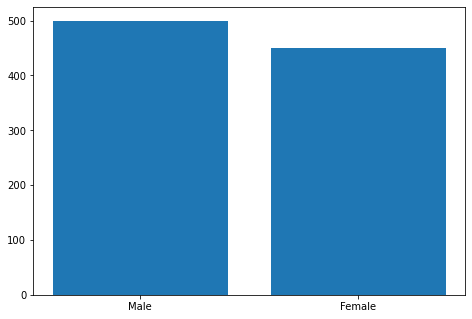

In [12]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])    

total_male_survived = 500
total_female_survived = 450

sex = ['Male', 'Female']
total_survived = [total_male_survived,total_female_survived]

ax.bar(sex,total_survived)

plt.show()

## Exercise 3: Did Sex play a role in Survival?

Advanced: you could also make sure that there are no other factors (e.g. age) confounding the impact of sex in survival.

For instance if a greater share of women than men were very old and their survival rate were lower this may be due to age factors rather than to sex.

In [28]:

# new column for ismale - convert 'male' to a number for analysis

titanic_df['IsMale'] = 0

titanic_df.loc[titanic_df['Sex']=='male','IsMale'] = 1


#new column for IsAdult - simple binary choice of adult (1) and child (0) + None (where age is NaN)

titanic_df['IsAdult'] = None
titanic_df.loc[titanic_df['Age']>=18,'IsAdult'] = 1     #adult
titanic_df.loc[titanic_df['Age']<18,'IsAdult'] = 0     #child

titanic_df.sample(50) #testing


#extract the columns we need
cropped = titanic_df[['IsAdult','IsMale','Survived']]



# work out total population for each category

                       #isAdult col == 0 (child)     #isMale col == 0 (female)
girls_total = sum(  (cropped.iloc[:,0] == 0) & (cropped.iloc[:,1] == 0)  ) 

                       #isAdult col == 0 (child)     #isMale col == 1 (male)
boys_total = sum(  (cropped.iloc[:,0] == 0) & (cropped.iloc[:,1] == 1)  ) 


                       #isAdult col == 1 (adult)     #isMale col == 0 (female)
women_total = sum(  (cropped.iloc[:,0] == 1) & (cropped.iloc[:,1] == 0)  ) 

                       #isAdult col == 1 (adult)     #isMale col == 1 (male)
men_total = sum(  (cropped.iloc[:,0] == 1) & (cropped.iloc[:,1] == 1)  ) 



# work out total of those who survived for each category

                  #isAdult col == 0 (child)  #isMale col == 0 (female)   #Survived col == 1
girl_sur = sum(  (cropped.iloc[:,0] == 0) & (cropped.iloc[:,1] == 0) & (cropped.iloc[:,2] == 1) )

                  #isAdult col == 0 (child)  #isMale col == 1 (male)   #Survived col == 1
boys_sur = sum(  (cropped.iloc[:,0] == 0) & (cropped.iloc[:,1] == 1) & (cropped.iloc[:,2] == 1) )

                  #isAdult col == 1 (adult)  #isMale col == 0 (female)   #Survived col == 1
women_sur = sum(  (cropped.iloc[:,0] == 1) & (cropped.iloc[:,1] == 0) & (cropped.iloc[:,2] == 1) )

                  #isAdult col == 1 (adult)  #isMale col == 1 (male)   #Survived col == 1
men_sur = sum(  (cropped.iloc[:,0] == 1) & (cropped.iloc[:,1] == 1) & (cropped.iloc[:,2] == 1) )


print("boys:", boys_total, "survived:", boys_sur, ", percentage: ", int( (boys_sur/boys_total)*100),"%" )
print("girls:",girls_total,"survived:", girl_sur, ", percentage: ", int( (girl_sur/girls_total)*100),"%" )
print("men:", men_total, "survived:", men_sur, ", percentage: ", int( (men_sur/men_total)*100),"%" )
print("women", women_total, ",survived:", women_sur, ", percentage: ", int( (women_sur/women_total)*100),"%"  )

#we could put the above variables into a dataframe

titanic_df.sample(50) #testing


#ATTRS = ["Survived", "Age", "IsMale"]

#titanic_df[ATTRS].corr('pearson')


# prob of survival == 1 given (if) ismale == 1



#titanic_df.groupby('Sex').mean()['Survived']

#titanic_df.groupby('Sex').count()['Survived']

#femaletotal = titanic_df.groupby('Sex').count()['Survived'][0]
#maletotal = titanic_df.groupby('Sex').count()['Survived'][1]




#titanic_df['Sex'].value_counts()


# co-variance



boys: 58 survived: 23 , percentage:  39 %
girls: 55 survived: 38 , percentage:  69 %
men: 395 survived: 70 , percentage:  17 %
women 206 ,survived: 159 , percentage:  77 %


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,IsMale,IsAdult,Alone,IsAlone
661,662,0,3,"Badt, Mr. Mohamed",male,40.0,0,0,2623,7.2250,NaN,C,1,1,1,1
299,300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,B58 B60,C,0,1,0,1
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S,1,None,1,1
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0000,NaN,S,1,1,1,1
492,493,0,1,"Molson, Mr. Harry Markland",male,55.0,0,0,113787,30.5000,C30,S,1,1,1,1
632,633,1,1,"Stahelin-Maeglin, Dr. Max",male,32.0,0,0,13214,30.5000,B50,C,1,1,1,1
197,198,0,3,"Olsen, Mr. Karl Siegwart Andreas",male,42.0,0,1,4579,8.4042,NaN,S,1,1,0,1
456,457,0,1,"Millet, Mr. Francis Davis",male,65.0,0,0,13509,26.5500,E38,S,1,1,1,1
486,487,1,1,"Hoyt, Mrs. Frederick Maxfield (Jane Anne Forby)",female,35.0,1,0,19943,90.0000,C93,S,0,1,0,1
420,421,0,3,"Gheorgheff, Mr. Stanio",male,NaN,0,0,349254,7.8958,NaN,C,1,None,1,1


In [29]:
#Adding labels for categories

titanic_df['IsAdult'] = "NONE"
titanic_df.loc[titanic_df['Age']>=18,'IsAdult'] = "Adult"     #adult
titanic_df.loc[titanic_df['Age']<18,'IsAdult'] = "Child"     #child

titanic_df.groupby(['IsAdult','Sex']).mean()['Survived']

IsAdult  Sex   
Adult    female    0.771845
         male      0.177215
Child    female    0.690909
         male      0.396552
NONE     female    0.679245
         male      0.129032
Name: Survived, dtype: float64

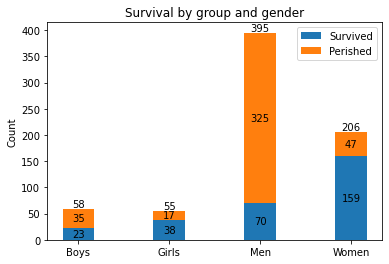

In [14]:
import matplotlib.pyplot as plt
import numpy as np

N = 4

survived = (boys_sur, girl_sur, men_sur, women_sur )
perished = (boys_total-boys_sur, girls_total-girl_sur, men_total-men_sur, women_total-women_sur )


ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

p1 = ax.bar(ind, survived, width, label='Survived')

p2 = ax.bar(ind, perished, width,
            bottom=survived, label='Perished')

ax.axhline(0, color='grey', linewidth=1)
ax.set_ylabel('Count')
ax.set_title('Survival by group and gender')

ax.set_xticks(ind, labels=['Boys', 'Girls', 'Men', 'Women'])
ax.legend()

# Label with label_type 'center' instead of the default 'edge'
ax.bar_label(p1, label_type='center')
ax.bar_label(p2, label_type='center')
ax.bar_label(p2)

plt.show()



In [32]:
titanic_df['IsAdult'] = None
titanic_df.loc[titanic_df['Age']>=18,'IsAdult'] = 1     #adult
titanic_df.loc[titanic_df['Age']>=50,'IsAdult'] = 2     #senior
titanic_df.loc[titanic_df['Age']<18,'IsAdult'] = 0     #child



#extract the columns we need
cropped = titanic_df[['IsAdult','IsMale','Survived']]



# work out total population for each category

                       #isAdult col == 0 (child)     #isMale col == 0 (female)
girls_total = sum(  (cropped.iloc[:,0] == 0) & (cropped.iloc[:,1] == 0)  ) 

                       #isAdult col == 0 (child)     #isMale col == 1 (male)
boys_total = sum(  (cropped.iloc[:,0] == 0) & (cropped.iloc[:,1] == 1)  ) 


                       #isAdult col == 1 (adult)     #isMale col == 0 (female)
women_total = sum(  (cropped.iloc[:,0] == 1) & (cropped.iloc[:,1] == 0)  ) 

                       #isAdult col == 1 (adult)     #isMale col == 1 (male)
men_total = sum(  (cropped.iloc[:,0] == 1) & (cropped.iloc[:,1] == 1)  ) 

                            #isAdult col == 2 (senior)     #isMale col == 1 (male)
senior_men_total = sum(  (cropped.iloc[:,0] == 2) & (cropped.iloc[:,1] == 1)  ) 

                            #isAdult col == 2 (senior)     #isMale col == 0 (female)
senior_women_total = sum(  (cropped.iloc[:,0] == 2) & (cropped.iloc[:,1] == 0)  ) 



# work out total of those who survived for each category

                  #isAdult col == 0 (child)  #isMale col == 0 (female)   #Survived col == 1
girl_sur = sum(  (cropped.iloc[:,0] == 0) & (cropped.iloc[:,1] == 0) & (cropped.iloc[:,2] == 1) )

                  #isAdult col == 0 (child)  #isMale col == 1 (male)   #Survived col == 1
boys_sur = sum(  (cropped.iloc[:,0] == 0) & (cropped.iloc[:,1] == 1) & (cropped.iloc[:,2] == 1) )

                  #isAdult col == 1 (adult)  #isMale col == 0 (female)   #Survived col == 1
women_sur = sum(  (cropped.iloc[:,0] == 1) & (cropped.iloc[:,1] == 0) & (cropped.iloc[:,2] == 1) )

                  #isAdult col == 1 (adult)  #isMale col == 1 (male)   #Survived col == 1
men_sur = sum(  (cropped.iloc[:,0] == 1) & (cropped.iloc[:,1] == 1) & (cropped.iloc[:,2] == 1) )

                     #isAdult col == 2 (senior)  #isMale col == 1 (male)   #Survived col == 1
senior_men_sur = sum(  (cropped.iloc[:,0] == 2) & (cropped.iloc[:,1] == 1) & (cropped.iloc[:,2] == 1) )

                     #isAdult col == 2 (senior)  #isMale col == 0 (female)   #Survived col == 1
senior_women_sur = sum(  (cropped.iloc[:,0] == 2) & (cropped.iloc[:,1] == 0) & (cropped.iloc[:,2] == 1) )

print("boys:", boys_total, "survived:", boys_sur, ", percentage: ", int( (boys_sur/boys_total)*100),"%" )
print("girls:",girls_total,"survived:", girl_sur, ", percentage: ", int( (girl_sur/girls_total)*100),"%" )
print("men:", men_total, "survived:", men_sur, ", percentage: ", int( (men_sur/men_total)*100),"%" )
print("women", women_total, ",survived:", women_sur, ", percentage: ", int( (women_sur/women_total)*100),"%"  )
print("senior men:", senior_men_total, "survived:", senior_men_sur, ", percentage: ", int( (senior_men_sur/senior_men_total)*100),"%" )
print("senior women", senior_women_total, ",survived:", senior_women_sur, ", percentage: ", int( (senior_women_sur/senior_women_total)*100),"%"  )





# titanic_df.sample(50) #testing



boys: 58 survived: 23 , percentage:  39 %
girls: 55 survived: 38 , percentage:  69 %
men: 343 survived: 63 , percentage:  18 %
women 184 ,survived: 139 , percentage:  75 %
senior men: 52 survived: 7 , percentage:  13 %
senior women 22 ,survived: 20 , percentage:  90 %


In [31]:
#Adding labels for categories

titanic_df['IsAdult'] = "NONE"
titanic_df.loc[titanic_df['Age']>=18,'IsAdult'] = "Adult"     #adult
titanic_df.loc[titanic_df['Age']>=50,'IsAdult'] = "Senior"     #senior
titanic_df.loc[titanic_df['Age']<18,'IsAdult'] = "Child"     #child


titanic_df.groupby(['IsAdult','Sex']).mean()['Survived']

IsAdult  Sex   
Adult    female    0.755435
         male      0.183673
Child    female    0.690909
         male      0.396552
NONE     female    0.679245
         male      0.129032
Senior   female    0.909091
         male      0.134615
Name: Survived, dtype: float64

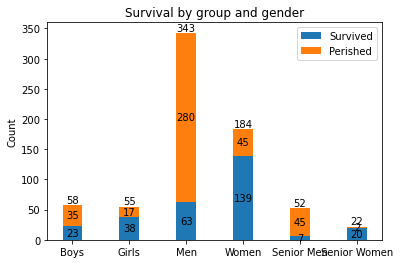

In [33]:
import matplotlib.pyplot as plt
import numpy as np

N = 6

survived = (boys_sur, girl_sur, men_sur, women_sur, senior_men_sur, senior_women_sur )
perished = (boys_total-boys_sur, girls_total-girl_sur, men_total-men_sur, women_total-women_sur, senior_men_total-senior_men_sur, senior_women_total-senior_women_sur )


ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

p1 = ax.bar(ind, survived, width, label='Survived')

p2 = ax.bar(ind, perished, width,
            bottom=survived, label='Perished')

ax.axhline(0, color='grey', linewidth=1)
ax.set_ylabel('Count')
ax.set_title('Survival by group and gender')

ax.set_xticks(ind, labels=['Boys', 'Girls', 'Men', 'Women', 'Senior Men', 'Senior Women'])
ax.legend()

# Label with label_type 'center' instead of the default 'edge'
ax.bar_label(p1, label_type='center')
ax.bar_label(p2, label_type='center')
ax.bar_label(p2)

plt.show()

## Exercise 4: Did class played role in survival ?

In [34]:
# 1st 
# 2nd 
# 3rd 

titanic_df.groupby(['Pclass','Sex']).mean()['Survived']



Pclass  Sex   
1       female    0.968085
        male      0.368852
2       female    0.921053
        male      0.157407
3       female    0.500000
        male      0.135447
Name: Survived, dtype: float64

## Exercise 5: Did being alone onboard play a role in survival ?

Think of how you can extract the alone variable from the existing ones.

In [39]:
# **sibsp**: The dataset defines family relations in this way… Sibling = brother, sister, stepbrother, stepsister Spouse = husband, wife (mistresses and fiancés were ignored)

# **parch**: The dataset defines family relations in this way… Parent = mother, father Child = daughter, son, stepdaughter, stepson Some children travelled only with a nanny, therefore parch=0 for them.

# if sibsp and parch == 0 



titanic_df['IsAlone'] = 1

titanic_df.loc[(titanic_df['SibSp'] != 0) | (titanic_df['Parch'] != 0),'IsAlone'] = 0  #alone
#titanic_df.loc[,'IsAlone'] = 1  #alone


#extract the columns we need
cropped = titanic_df[['IsAlone', 'Survived']]

# work out total population for each category

                       #isAlone col == 1 (alone)     
alone_total = sum(  (cropped.iloc[:,0] == 1)   ) 

                       #isAlone col == 0 (not alone) 
not_alone_total = sum(  (cropped.iloc[:,0] == 0)   ) 




# work out total of those who survived for each category

                  #isAlone col == 1 (alone)  #Survived col == 1
alone_sur = sum(  (cropped.iloc[:,0] == 1) & (cropped.iloc[:,1] == 1) )

                  #isAlone col == 0 (not alone)  #Survived col == 1
not_alone_sur = sum(  (cropped.iloc[:,0] == 0) & (cropped.iloc[:,1] == 1)  )


print("alone total:",alone_total, ", sur:", alone_sur)
print("not alone total:",not_alone_total, ", sur:", not_alone_sur)


titanic_df.sample(50) #testing



alone total: 537 , sur: 163
not alone total: 354 , sur: 179


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,IsMale,IsAdult,Alone,IsAlone
361,362,0,2,"del Carlo, Mr. Sebastiano",male,29.00,1,0,SC/PARIS 2167,27.7208,NaN,C,1,1,0,0
842,843,1,1,"Serepeca, Miss. Augusta",female,30.00,0,0,113798,31.0000,NaN,C,0,1,1,1
69,70,0,3,"Kink, Mr. Vincenz",male,26.00,2,0,315151,8.6625,NaN,S,1,1,0,0
478,479,0,3,"Karlsson, Mr. Nils August",male,22.00,0,0,350060,7.5208,NaN,S,1,1,1,1
202,203,0,3,"Johanson, Mr. Jakob Alfred",male,34.00,0,0,3101264,6.4958,NaN,S,1,1,1,1
733,734,0,2,"Berriman, Mr. William John",male,23.00,0,0,28425,13.0000,NaN,S,1,1,1,1
775,776,0,3,"Myhrman, Mr. Pehr Fabian Oliver Malkolm",male,18.00,0,0,347078,7.7500,NaN,S,1,1,1,1
206,207,0,3,"Backstrom, Mr. Karl Alfred",male,32.00,1,0,3101278,15.8500,NaN,S,1,1,0,0
451,452,0,3,"Hagland, Mr. Ingvald Olai Olsen",male,NaN,1,0,65303,19.9667,NaN,S,1,None,0,0
447,448,1,1,"Seward, Mr. Frederic Kimber",male,34.00,0,0,113794,26.5500,NaN,S,1,1,1,1


In [42]:

titanic_df['Alone'] = 1

titanic_df.loc[(titanic_df['SibSp'] != 0) | (titanic_df['Parch'] != 0), 'Alone'] = 0


print("alone total:",sum(titanic_df['Alone'] == 1))
print("not alone total:",sum(titanic_df['Alone'] == 0))



#print("alone survived:",sum( (titanic_df['Alone'] == 1) | (titanic_df['Survived'] == 1) )
#print("not alone surived:",sum( (titanic_df['Alone'] == 0) | (titanic_df['Survived'] == 1)   )


SyntaxError: invalid syntax (144054992.py, line 10)